# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 579
['wainwright', 'bredasdorp', 'inhambane', 'port-aux-francais', 'enewetak', 'edinburgh of the seven seas', 'stanley', 'blackmans bay', 'bethel', 'korla', 'puerto natales', 'puerto san carlos', 'cabo san lucas', 'troy', 'sao raimundo das mangabeiras', 'constantia', 'adamstown', 'vernon', "'ohonua", 'kazan', 'east ballina', 'iqaluit', 'selkirk', 'longyearbyen', 'atafu village', 'san patricio', 'kavieng', 'puerto ayora', 'charters towers', 'ust-tsilma', 'aldinga beach', 'tvoroyri', 'bilibino', 'sona', 'henryetta', 'carnarvon', 'papatowai', 'port alfred', 'floro', 'langepas', 'talnakh', 'moussoro', 'mount pleasant', 'qaqortoq', "muzayri'", 'hasaki', 'wailua homesteads', 'grytviken', 'saipan', 'laascaanood', 'camminghaburen', "capo d'orlando", 'tazovsky', 'tsiombe', 'fale old settlement', 'hadibu', 'conduaga', 'port douglas', 'ar raqqah', 'pacific grove', 'lebu', 'mata-utu', 'emerald', 'saint-pierre', 'asau', 'al artawiyah', 'waitangi', 'ushuaia', 'hirara', 

In [29]:
# #Set the API base URL 
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = 'Imperial'
# city = "Suntar"
# city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

# city_weather = requests.get(city_url)
# city_weather_json = city_weather.json()
# print(city_weather_json)

# city_lat = city_weather_json['coord']['lat']
# city_lng = city_weather_json['coord']['lon']
# city_max_temp = city_weather_json['main']['temp_max']
# city_humidity = city_weather_json['main']['humidity']
# city_clouds = city_weather_json['clouds']['all']
# city_wind = city_weather_json['wind']['speed']
# city_country = city_weather_json['sys']['country']
# city_date = city_weather_json['dt']

# city_data= []

# city_data.append({"City": city,
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# print(city_data)
# city_data_df = pd.DataFrame(city_data)
# city_data_df

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
#Set the API base URL 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wainwright
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | troy
Processing Record 15 of Set 1 | sao raimundo das mangabeiras
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | vernon
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | kazan
Process

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wainwright,52.8390,-110.8572,-4.10,92,12,3.46,CA,1730646572
1,bredasdorp,-34.5322,20.0403,19.43,54,100,11.76,ZA,1730646573
2,inhambane,-23.8650,35.3833,26.99,74,0,6.69,MZ,1730646574
3,port-aux-francais,-49.3500,70.2167,5.34,83,20,9.68,TF,1730646575
4,enewetak,11.3474,162.3373,28.14,78,18,1.83,MH,1730646577


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wainwright,52.8390,-110.8572,-4.10,92,12,3.46,CA,1730646572
1,bredasdorp,-34.5322,20.0403,19.43,54,100,11.76,ZA,1730646573
2,inhambane,-23.8650,35.3833,26.99,74,0,6.69,MZ,1730646574
3,port-aux-francais,-49.3500,70.2167,5.34,83,20,9.68,TF,1730646575
4,enewetak,11.3474,162.3373,28.14,78,18,1.83,MH,1730646577


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

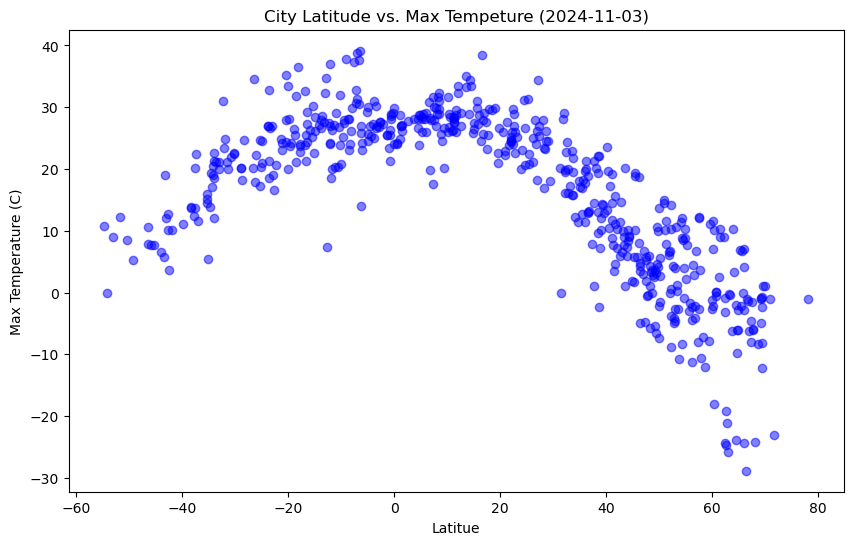

In [35]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE
date_of_collection = datetime.datetime.now().strftime("%Y-%m-%d")
plt.title(f'City Latitude vs. Max Tempeture ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Max Temperature (C)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

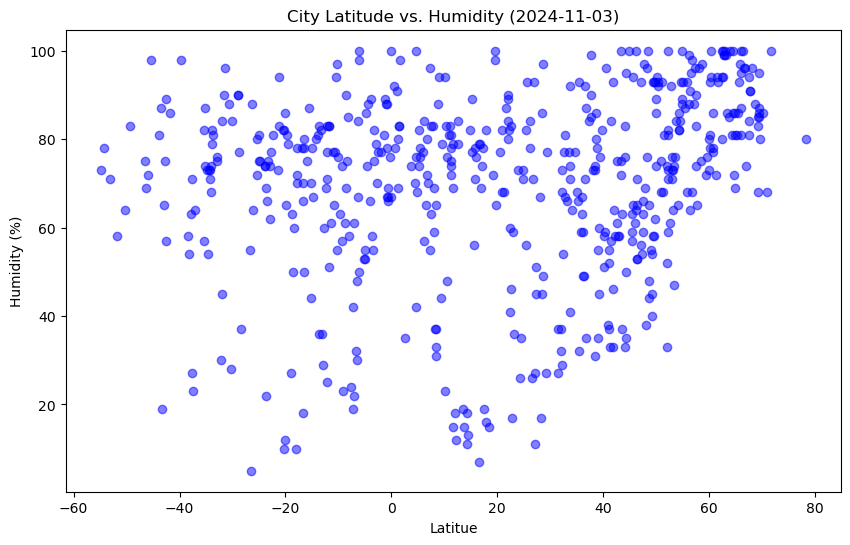

In [36]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

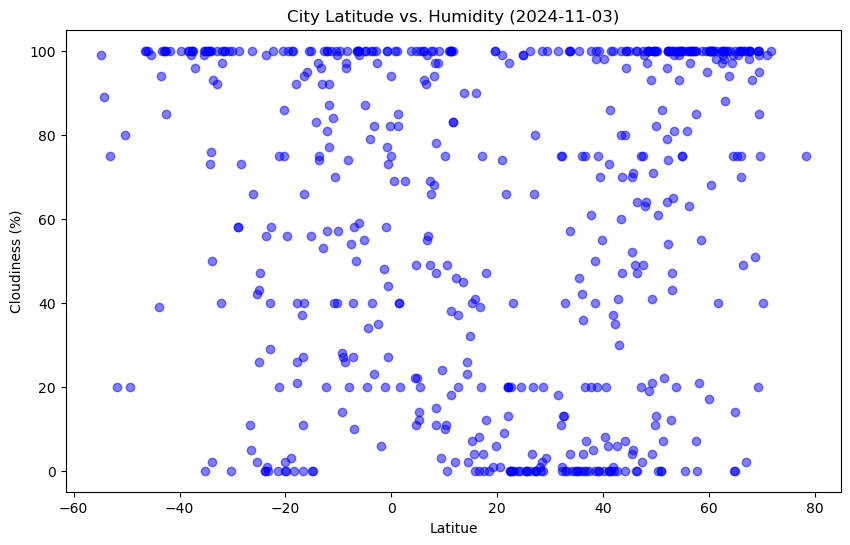

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Cloudiness (%)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

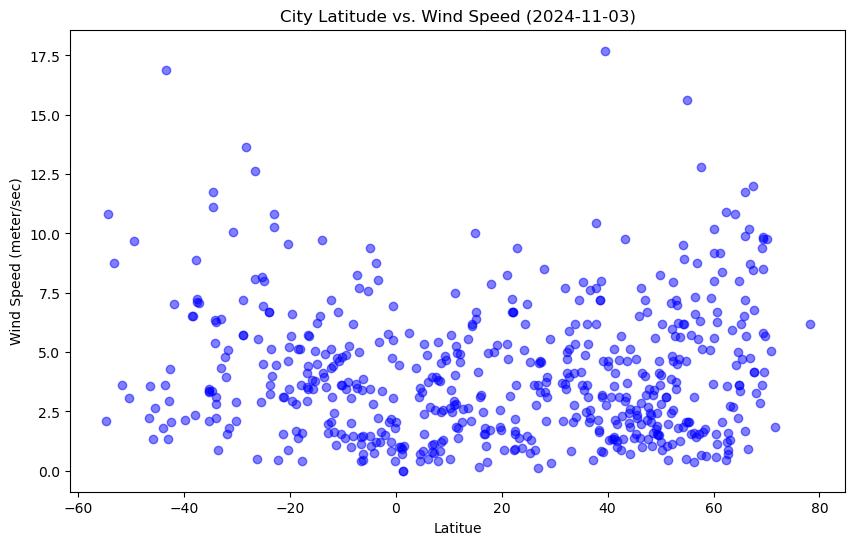

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Wind Speed (meter/sec)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
# Plot_info ={"df"}
# linear_regression_plots(f{df, plot_info, date_of_collection)
# YOUR CODE HERE
# x = 0
# y = 0
# slope, intercept, r_value, p_value, std_err = linregress(x,y)
# y_pred = slope * x + intercept
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, color='blue', label='Data points')  # Scatter plot of the data
# plt.plot(x, y_pred, color='red', label='Regression line')  # Regression line

# # Add labels and title
# plt.xlabel('Independent Variable (X)')
# plt.ylabel('Dependent Variable (Y)')
# plt.title('Linear Regression Example')

# # Annotate the line equation and R² value
# line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
# plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wainwright,52.8390,-110.8572,-4.10,92,12,3.46,CA,1730646572
4,enewetak,11.3474,162.3373,28.14,78,18,1.83,MH,1730646577
6,stanley,54.8680,-1.6985,10.29,89,75,0.51,GB,1730646579
8,bethel,41.3712,-73.4140,7.63,57,0,4.12,US,1730646581
9,korla,41.7597,86.1469,11.04,46,1,1.26,CN,1730646582


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,19.43,54,100,11.76,ZA,1730646573
2,inhambane,-23.8650,35.3833,26.99,74,0,6.69,MZ,1730646574
3,port-aux-francais,-49.3500,70.2167,5.34,83,20,9.68,TF,1730646575
5,edinburgh of the seven seas,-37.0676,-12.3116,11.54,64,96,7.05,SH,1730646578
7,blackmans bay,-43.0167,147.3167,12.07,65,100,1.34,AU,1730646580


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:-0.87


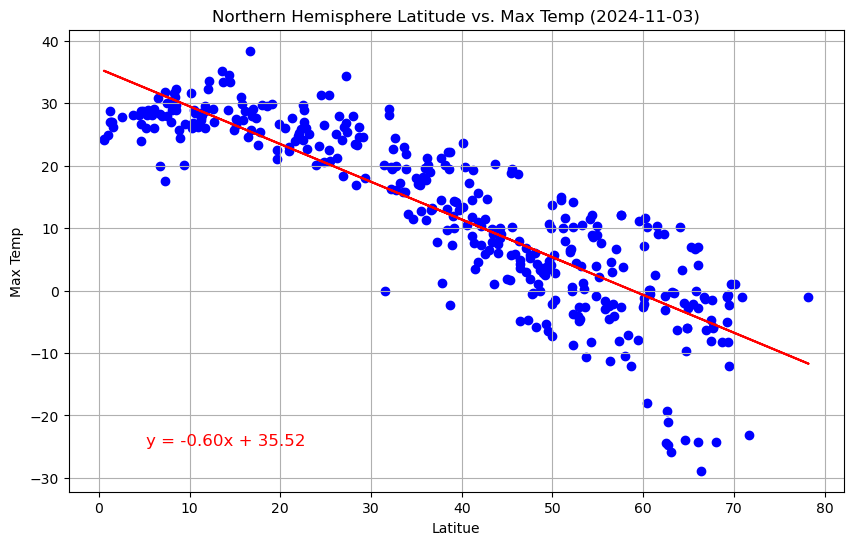

In [71]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Northern Hemisphere Latitude vs. Max Temp ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Max Temp')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')
plt.savefig("output_data/Fig5.png")

# Show legend
#plt.legend()
plt.grid()
plt.show()

The r^2-value is:0.73


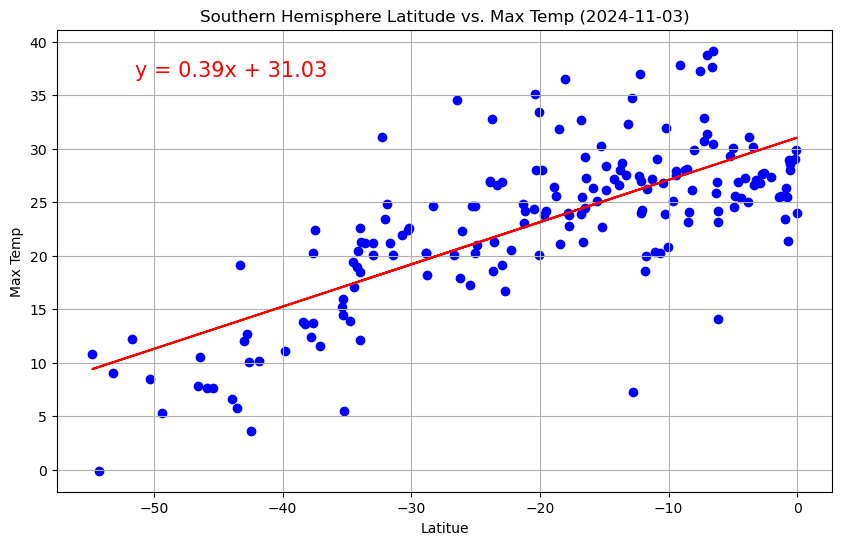

In [76]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Southern Hemisphere Latitude vs. Max Temp ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Max Temp')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=15, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig6.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** As you move away from the equator in either the northern or southern hemispheres, the maximum temperatures on November 3, 2024, are increasing. Additionally, there is a larger number of renamed cities located in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:0.33


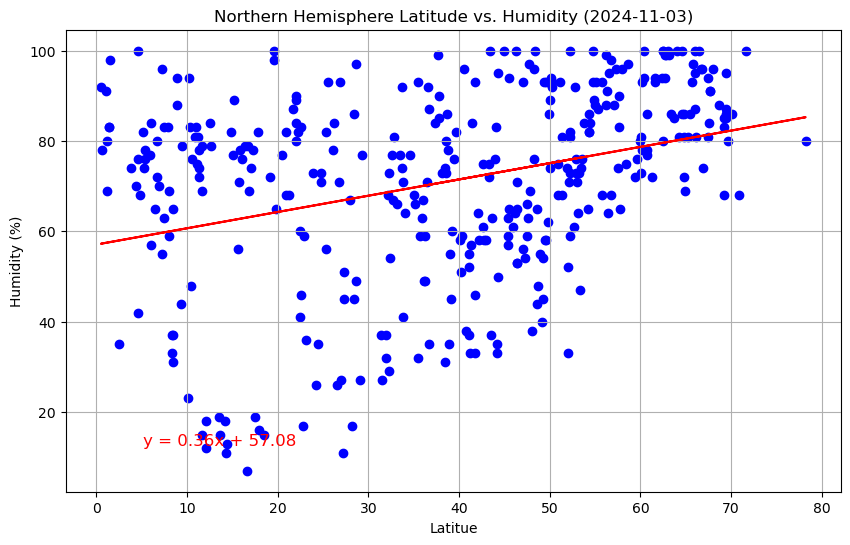

In [74]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Northern Hemisphere Latitude vs. Humidity ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Humidity (%)')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig7.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()



The r^2-value is:-0.03


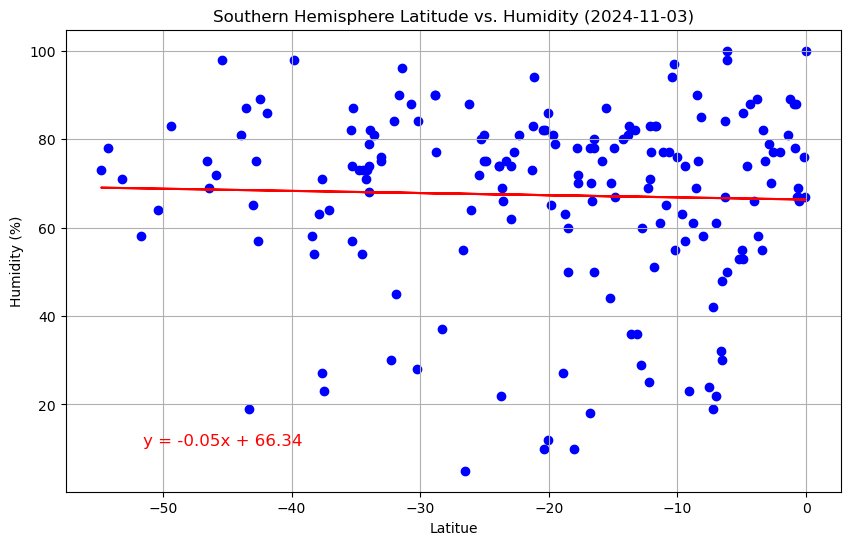

In [75]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Southern Hemisphere Latitude vs. Humidity ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Humidity (%)')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig8.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The Northern hemisphere data indicates a slight positive correlation between latitude and humidity. As latitude increases, so does the humidity, albeit not drastically. This makes sense considering how proximity to oceans and weather patterns like the jet stream affect humidity. In contrast, the Southern hemispherer indicates a slight negative correlation between latitude and humidity. As latitude increases towards the equator, humidity decreases slightly. This might be due to various climate factors, such as ocean currents and regional weather patterns.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:0.30


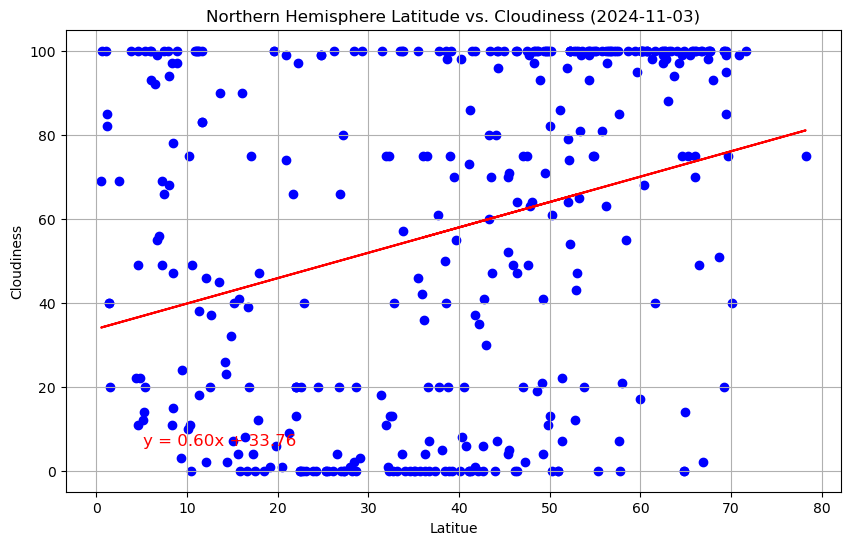

In [77]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Cloudiness')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig9.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()

The r^2-value is:-0.15


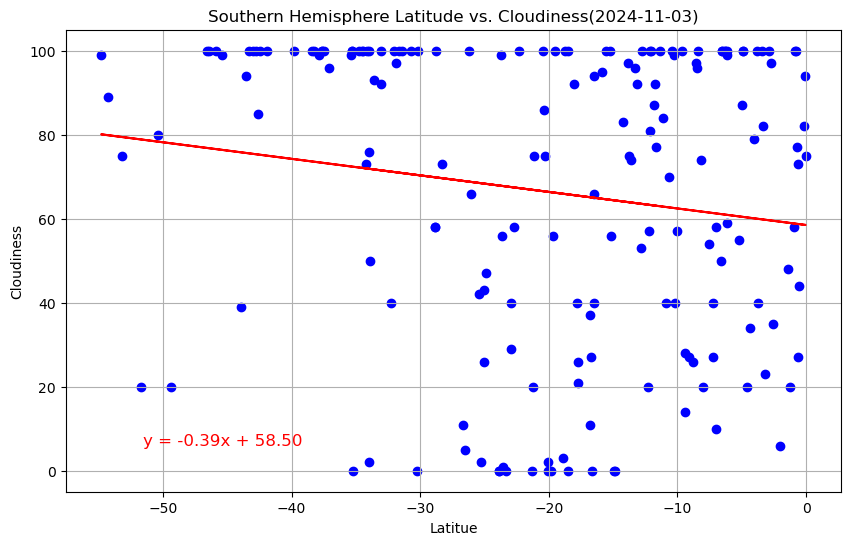

In [78]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Cloudiness')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig10.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:The two scatter plots show that cloudiness decreases as you approach the equator. In the Northern Hemisphere, there’s a positive correlation between latitude and cloudiness, while in the Southern Hemisphere, there’s a negative correlation. This indicates that as latitude increases or decreases from zero, so does cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:0.26


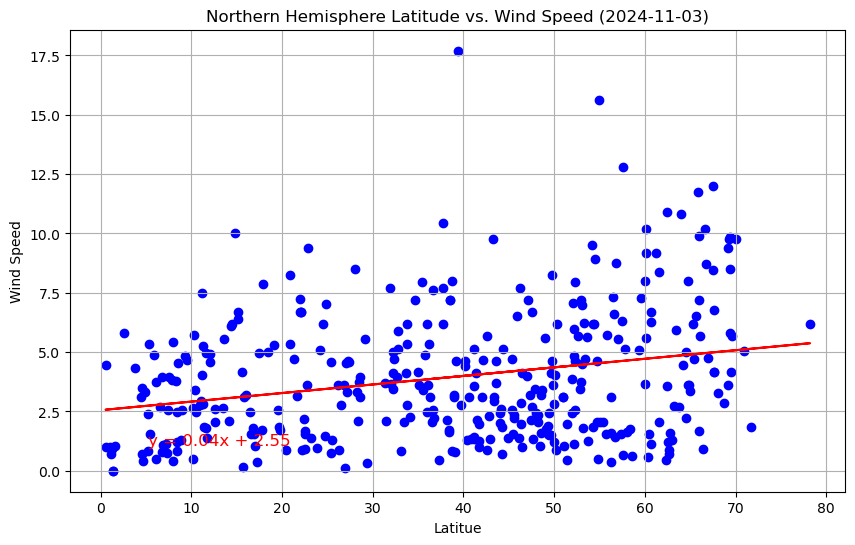

In [79]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed ({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Wind Speed')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig11.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()

The r^2-value is:-0.25


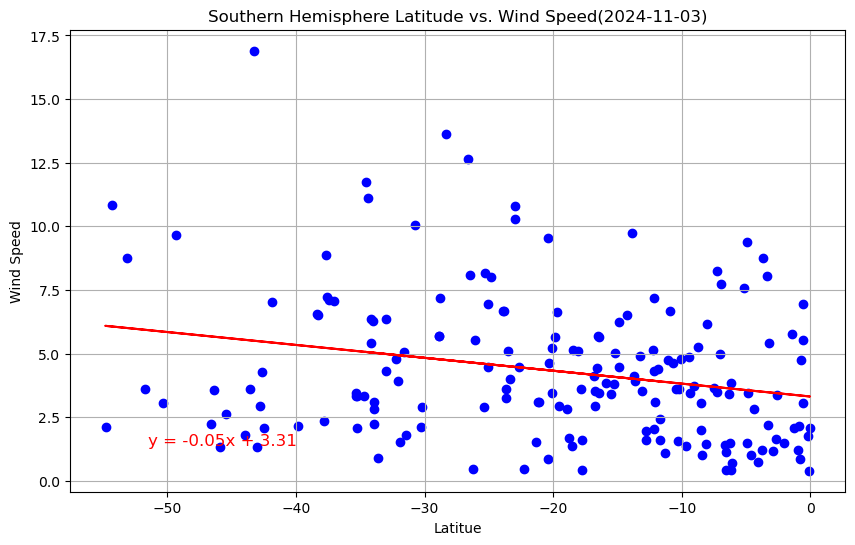

In [80]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_pred = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red') 

# Incorporate the other graph properties
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed({date_of_collection})')
plt.xlabel('Latitue')
plt.ylabel('Wind Speed')


# Annotate the line equation and R² value
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')
# plt.annotate(f'R² = {r_value**2:.2f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')
print(f'The r^2-value is:{r_value:.2f}')

plt.savefig("output_data/Fig12.png")
# Show legend
#plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** Their is a slight indication that as you get closer to the equator the wind speeds decrease.  